## Problem statement 

It's a binary classification problem where we have to predict whether the loan would be approved or not.

## Hypothesis Generation 

Here is a list of all the many possible factors that can affect (impact) the outcome :
- The salary of the applicant: the higher the income, the greater his chances of getting the loan.
- Loan amount: the lower the amount, the greater his chances of getting the loan.
- Credit history: if applicants have repayed their previous debts, it should improve the credit score.
- Loan term: Short-term loan and smaller amount should positively impact the loan approval 
- EMI:Equated Monthly Instalment (EMI) is a fixed monthly payment, part of the equally divided repayments, used to clear off your outstanding loan. Lower the EMI, higher the chances of loan approval 

In [273]:
#Loading modules
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns  
sns.set()# For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import sklearn
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
#Data 
train = pd.read_csv("train_ctrUa4K.csv") 
#We have 3 .csv files: 
#- Train file: will be used for training our model. Contains independent variables + the target
#- Test file: contains only the independant variables. We will apply the modele to predict the target for these data. 
#- Sample submission: contains the format in which we have to submit our predictions
#Let's make a copy of the files to keep the original datasets unchanged 
train_original=train.copy() 


## Heatmap

To look at the correlation between the features, we need a heatmap, and therefore numerical variables.
Let's convert the Loan_Status and Dependants variables.

The variables with darker color means their correlation is more important.

In [274]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)


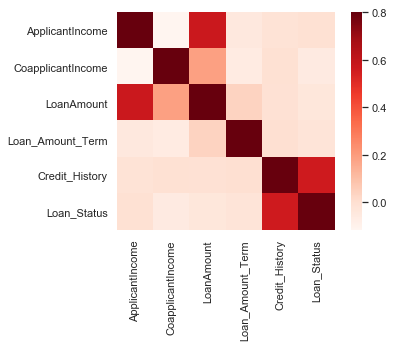

In [275]:
loan_matrix = train.corr() 
#f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(loan_matrix, vmax=.8, square=True, cmap="Reds");



The most correlated variables are:
- ApplicantIncome and LoanAmount
- Credit_History and Loan_Status 
- LoanAmount CoapplicantIncome too

## Handling Missing values

### Train dataset 

Missing values summary

In [276]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling Gender, Married, Dependents, Self_Employed and Credit_History with the mode as they are categorical features 

In [277]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Let's analyse the remaining features: LoanAmount, LoanAmount_Term, numerical variables

#### LoanAmount

As we saw a lot of outliers previously, we will fill missing values with the median

In [278]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

#### LoanAmount_Term

As we've seen in the barplot, the value of 360 is the most repeated. 
So we will replace the missing values in this variable using the mode.



In [279]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Checking the whole dataset

In [280]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Great !

## Handling Outliers

### Performing normality test for numerical variables

#### from scipy import stats
k2, p1 = stats.normaltest(train['ApplicantIncome'])
print(p1)
k2, p2 = stats.normaltest(train['CoapplicantIncome'])
print(p2)
k2, p3 = stats.normaltest(train['LoanAmount'])
print(p3)
k2, p4 = stats.normaltest(train['Loan_Amount_Term'])
print(p4)

#All the distributions are normal

In [281]:
train.skew(axis = 0, skipna = True) 
# Calculates the Fisher–Pearson standardized moment coefficient for all columns in a dataframe.
# The variables "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term" are skewed
#(3 are positive skewed data and the last is negative)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Loan_Status         -0.809998
dtype: float64

As we've seen previously, the distribution of loanAmount is skewed, so we will apply the log transformation

<Figure size 432x288 with 0 Axes>

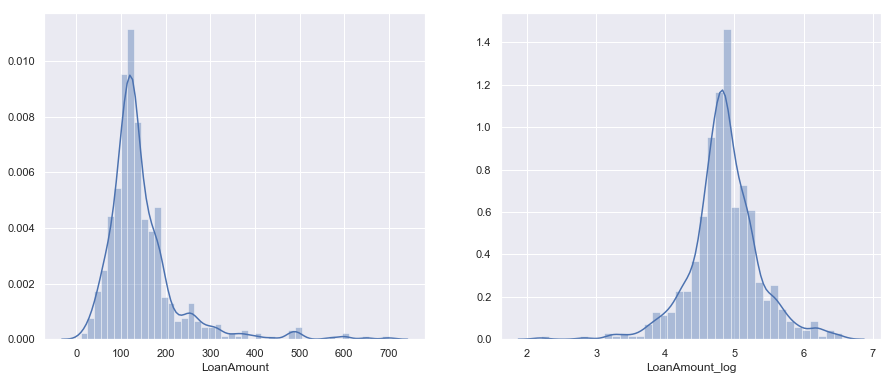

In [282]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 

plt.figure(1) 
plt.subplots(figsize=(15,6))
plt.subplot(121) 
sns.distplot(train['LoanAmount']); 
plt.subplot(122) 
sns.distplot(train['LoanAmount_log']); 
plt.show()





Drop Loan_ID 

In [283]:
train=train.drop('Loan_ID',axis=1) 


## Model building 

Reminder : we are dealing with a supervised regression machine learning problem. 
We are trying to predict the Loan eligibility based on customer information.

### Logistic Regression 

Used for binary classification

### Validation set approach 

Drop the target variable

In [284]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

Dummies 

In [287]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 


Divide the train dataset into train (70%)+ validation (30%) parts

In [288]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

Fitting the logistic regression model



In [289]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=1.0, class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,
                   multi_class='ovr',n_jobs=1,penalty='l2',random_state=1,
                   solver='liblinear', tol=0.0001,verbose=0, warm_start=False) 
model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predict the target for validation


In [290]:
pred_test = model.predict(x_test)
# Calculate the accuracy score 
accuracy_score(y_test,pred_test)

0.8054054054054054

#### That means that the model identified 80% of the loan status correctly.

### Feature engineering 

Add new features to  improve models predictions

### Total income

<Figure size 432x288 with 0 Axes>

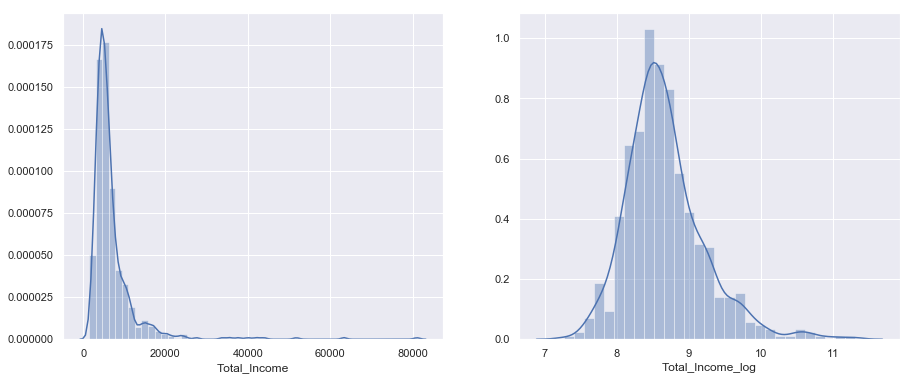

In [291]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

train['Total_Income_log'] = np.log(train['Total_Income']) 

plt.figure(2) 
plt.subplots(figsize=(15,6))
plt.subplot(121) 
sns.distplot(train['Total_Income']); 
plt.subplot(122) 
sns.distplot(train['Total_Income_log']); 
plt.show()





### EMI

It's the ratio of loan amount with respect to loan amount term.

In [292]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 

<Figure size 432x288 with 0 Axes>

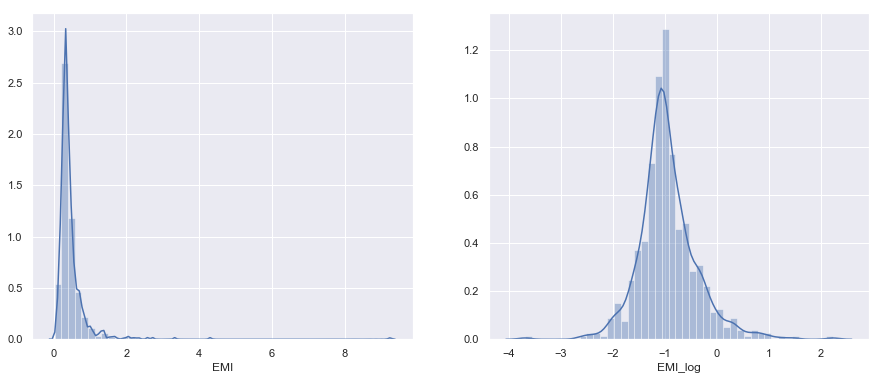

In [293]:
train['EMI_log'] = np.log(train['EMI']) 

plt.figure(2) 
plt.subplots(figsize=(15,6))
plt.subplot(121) 
sns.distplot(train['EMI']); 
plt.subplot(122) 
sns.distplot(train['EMI_log']); 
plt.show()

### Drop features

 The correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 
 Removing correlated features will help in reducing the noise .

In [294]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income','EMI'], axis=1) 


In [295]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_log', 'EMI_log'],
      dtype='object')

### Building models after features engineering 

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

In [296]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status  


### I- Logistic regression with 10-Fold Cross Validation

The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model.

In [321]:
from sklearn.model_selection import StratifiedKFold
scores = []
# Create the model
model = LogisticRegression(C=1.0, class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,
               multi_class='ovr',n_jobs=1,penalty='l2',random_state=1,
               solver='liblinear', tol=0.0001,verbose=0, warm_start=False) 

i=1 

#  Instantiate the cross validator
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 

# Loop through the indices the split() method returns

for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    # Generate batches from indices
    xtrain,xval,ytrain,yval = X.loc[train_index],X.loc[test_index],y[train_index],y[test_index]     
    # Fit the model 
    model.fit(xtrain, ytrain)     
    pred_test = model.predict(xval)     
    score = accuracy_score(yval,pred_test) 
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 
    
print('\n The mean validation accuracy for this model is {}'.format(np.mean(scores)))




1 of kfold 10
accuracy_score 0.7777777777777778

2 of kfold 10
accuracy_score 0.8095238095238095

3 of kfold 10
accuracy_score 0.8360655737704918

4 of kfold 10
accuracy_score 0.8360655737704918

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.8360655737704918

7 of kfold 10
accuracy_score 0.8032786885245902

8 of kfold 10
accuracy_score 0.7704918032786885

9 of kfold 10
accuracy_score 0.819672131147541

10 of kfold 10
accuracy_score 0.8524590163934426

 The mean validation accuracy for this model is 0.8111891751236013


### II- Decision Tree with 10-Fold Cross Validation

In [303]:
from sklearn import tree

In [306]:
scores = []
# Create the model

model = tree.DecisionTreeClassifier(random_state=1)     

i=1 

#  Instantiate the cross validator
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 

# Loop through the indices the split() method returns

for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    # Generate batches from indices
    xtrain,xval,ytrain,yval = X.loc[train_index],X.loc[test_index],y[train_index],y[test_index]     
    # Fit the model 
    model.fit(xtrain, ytrain)     
    pred_test = model.predict(xval)     
    score = accuracy_score(yval,pred_test) 
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 
    
print('\n The mean validation accuracy for this model is {}'.format(np.mean(scores)))




1 of kfold 10
accuracy_score 0.7936507936507936

2 of kfold 10
accuracy_score 0.7936507936507936

3 of kfold 10
accuracy_score 0.7049180327868853

4 of kfold 10
accuracy_score 0.7377049180327869

5 of kfold 10
accuracy_score 0.6721311475409836

6 of kfold 10
accuracy_score 0.6721311475409836

7 of kfold 10
accuracy_score 0.7213114754098361

8 of kfold 10
accuracy_score 0.6885245901639344

9 of kfold 10
accuracy_score 0.7704918032786885

10 of kfold 10
accuracy_score 0.7213114754098361

 The mean validation accuracy for this model is 0.7275826177465522


We got a mean accuracy of 0.72 which is much less than the accuracy from logistic regression model. 
So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

### III- Random Forest with 10-Fold Cross Validation

In [307]:
from sklearn.ensemble import RandomForestClassifier

In [308]:
scores = []
# Create the model

model = RandomForestClassifier(random_state=1, max_depth=10)     

i=1 

#  Instantiate the cross validator
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 

# Loop through the indices the split() method returns

for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    # Generate batches from indices
    xtrain,xval,ytrain,yval = X.loc[train_index],X.loc[test_index],y[train_index],y[test_index]     
    # Fit the model 
    model.fit(xtrain, ytrain)     
    pred_test = model.predict(xval)     
    score = accuracy_score(yval,pred_test) 
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 
    
print('\n The mean validation accuracy for this model is {}'.format(np.mean(scores)))




1 of kfold 10
accuracy_score 0.7936507936507936

2 of kfold 10
accuracy_score 0.7936507936507936

3 of kfold 10
accuracy_score 0.7868852459016393

4 of kfold 10
accuracy_score 0.8360655737704918

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.7704918032786885

7 of kfold 10
accuracy_score 0.8032786885245902

8 of kfold 10
accuracy_score 0.7704918032786885

9 of kfold 10
accuracy_score 0.819672131147541

10 of kfold 10
accuracy_score 0.8032786885245902

 The mean validation accuracy for this model is 0.7947957325006505


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Let's improve the accuracy by optimizing the hyperparameters values, thanks to grid search.

In [309]:
from sklearn.model_selection import GridSearchCV

In [311]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

# Use the grid to search for best hyperparameters

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [312]:
# Estimating the optimized value 
grid_search.best_estimator_



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

So, the optimized value for the max_depth is 5 and for n_estimator is 101. 
Now let’s build the model using these optimized values.

In [313]:
scores = []
# Create the model

model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=101)

i=1 

#  Instantiate the cross validator
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 

# Loop through the indices the split() method returns

for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    # Generate batches from indices
    xtrain,xval,ytrain,yval = X.loc[train_index],X.loc[test_index],y[train_index],y[test_index]     
    # Fit the model 
    model.fit(xtrain, ytrain)     
    pred_test = model.predict(xval)     
    score = accuracy_score(yval,pred_test) 
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 
    
print('\n The mean validation accuracy for this model is {}'.format(np.mean(scores)))



1 of kfold 10
accuracy_score 0.7936507936507936

2 of kfold 10
accuracy_score 0.8095238095238095

3 of kfold 10
accuracy_score 0.819672131147541

4 of kfold 10
accuracy_score 0.8360655737704918

5 of kfold 10
accuracy_score 0.7704918032786885

6 of kfold 10
accuracy_score 0.8360655737704918

7 of kfold 10
accuracy_score 0.819672131147541

8 of kfold 10
accuracy_score 0.7704918032786885

9 of kfold 10
accuracy_score 0.8032786885245902

10 of kfold 10
accuracy_score 0.8360655737704918

 The mean validation accuracy for this model is 0.8094977881863128


Let us find the most important features:

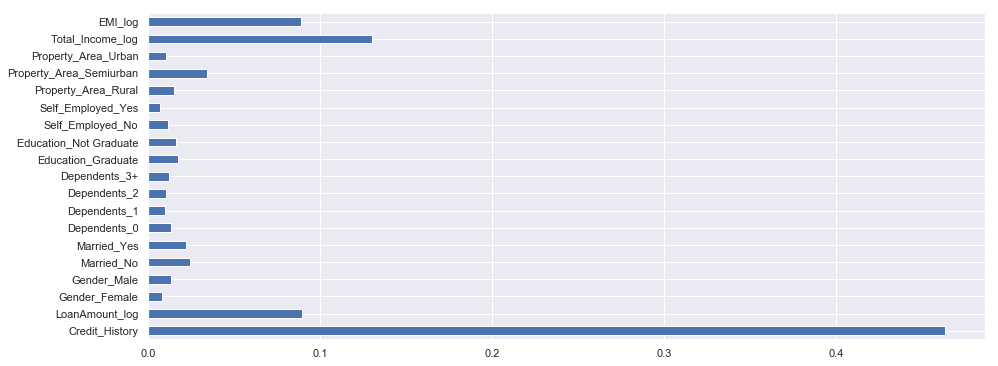

In [315]:
important_features=pd.Series(model.feature_importances_, index=X.columns) 
important_features.plot(kind='barh', figsize=(15,6))

### We can see that Credit_History is the most important feature followed by Total Income,LoanAmount, EMI. So, feature engineering helped us a lot in predicting our target variable.

### III- XGBOOST with 10-Fold Cross Validation

In [319]:
from xgboost import XGBClassifier

In [320]:
scores = []
# Create the model

model = XGBClassifier(n_estimators=50, max_depth=4)     
i=1 

#  Instantiate the cross validator
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True) 

# Loop through the indices the split() method returns

for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    # Generate batches from indices
    xtrain,xval,ytrain,yval = X.loc[train_index],X.loc[test_index],y[train_index],y[test_index]     
    # Fit the model 
    model.fit(xtrain, ytrain)     
    pred_test = model.predict(xval)     
    score = accuracy_score(yval,pred_test) 
    scores.append(score)
    print('accuracy_score',score)     
    i+=1 
    
print('\n The mean validation accuracy for this model is {}'.format(np.mean(scores)))



1 of kfold 10
accuracy_score 0.8095238095238095

2 of kfold 10
accuracy_score 0.7777777777777778

3 of kfold 10
accuracy_score 0.8360655737704918

4 of kfold 10
accuracy_score 0.8032786885245902

5 of kfold 10
accuracy_score 0.7540983606557377

6 of kfold 10
accuracy_score 0.819672131147541

7 of kfold 10
accuracy_score 0.7868852459016393

8 of kfold 10
accuracy_score 0.7704918032786885

9 of kfold 10
accuracy_score 0.8032786885245902

10 of kfold 10
accuracy_score 0.8360655737704918

 The mean validation accuracy for this model is 0.7997137652875359


### After trying and testing 4 different algorithms, the best accuracy is achieved by Logistic Regression (0.81), followed by XGBoost(0.8)

- Logistic Regression: 0.81
- Decision Tree: 0.73
- Random Forest: 0.79
- XGBoost: 0.80

